<a href="https://colab.research.google.com/github/Kikome-Christine/-Medical-plant-species-identification/blob/main/plant_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tinakik","key":"eb4d688dadd0d803dcb6aedb02784176"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                           title                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------  --------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data            Vehicle Sales Data                 19MB  2024-02-21 20:16:17          16918        298  1.0              
sudarshan24byte/online-food-dataset           Online Food Dataset                 3KB  2024-03-02 18:50:30           6545        115  0.9411765        
arnavvvvv/spotify-music                       Top Spotify Songs                  47KB  2024-03-06 05:20:29           5144         70  1.0              
bhavikjikadara/student-study-performance      Student Study Performance           9KB  2024-03-07 06:14:09           4035         72  1.0              
nbroad/gemma-rewrite-nbroad                   gemma-rewrite-nbroad                8MB  2

In [ ]:
!kaggle datasets download -d bijlyborkatullah/medicinal-plant-bijly-withbg

100% 15.6G/15.6G [02:57<00:00, 170MB/s]
100% 15.6G/15.6G [02:57<00:00, 94.3MB/s]


In [43]:
!unzip medicinal-plant-bijly-withbg.zip

Archive:  medicinal-plant-bijly-withbg.zip
replace Medicinal Plant-Bijly-withBG/Test/Bohera/(1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Data Preprocessing

In [27]:
import tensorflow as tf

# Define the path to the training directory
Train = "/content/Medicinal Plant-Bijly-withBG/Train"

# Load the training dataset using TensorFlow's image_dataset_from_directory function
training_set = tf.keras.utils.image_dataset_from_directory(
    Train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3500 files belonging to 10 classes.


In [28]:
import tensorflow as tf

# Define the path to the training directory
Validation = "/content/Medicinal Plant-Bijly-withBG/Validation"

# Load the training dataset using TensorFlow's image_dataset_from_directory function
Validation_set = tf.keras.utils.image_dataset_from_directory(
    Validation,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 500 files belonging to 10 classes.


In [29]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [30]:
cnn = tf.keras.models.Sequential()

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [37]:
cnn.add(tf.keras.layers.Flatten())

In [38]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [39]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [40]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [41]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [44]:
training_history = cnn.fit(x=training_set,validation_data=Validation_set,epochs=10)

Epoch 1/10
110/110 [==============================] - 809s 7s/step - loss: 1.6008 - accuracy: 0.4214 - val_loss: 1.4700 - val_accuracy: 0.5180
Epoch 2/10
110/110 [==============================] - 817s 7s/step - loss: 0.7027 - accuracy: 0.7434 - val_loss: 1.1064 - val_accuracy: 0.6100
Epoch 3/10
110/110 [==============================] - 831s 7s/step - loss: 0.4654 - accuracy: 0.8383 - val_loss: 0.9420 - val_accuracy: 0.7060
Epoch 4/10
110/110 [==============================] - 793s 7s/step - loss: 0.3006 - accuracy: 0.8949 - val_loss: 1.2702 - val_accuracy: 0.7000
Epoch 5/10
110/110 [==============================] - 752s 7s/step - loss: 0.2741 - accuracy: 0.9054 - val_loss: 1.1879 - val_accuracy: 0.6480
Epoch 6/10
110/110 [==============================] - 757s 7s/step - loss: 0.1749 - accuracy: 0.9383 - val_loss: 1.0462 - val_accuracy: 0.7160
Epoch 7/10
110/110 [==============================] - 778s 7s/step - loss: 0.1139 - accuracy: 0.9646 - val_loss: 0.8745 - val_accuracy: 0.7500

Evaluating Model

In [45]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

110/110 [==============================] - 457s 4s/step - loss: 0.1183 - accuracy: 0.9529
Training accuracy: 0.9528571367263794


In [46]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(Validation_set)
print('Validation accuracy:', val_acc)

16/16 [==============================] - 64s 2s/step - loss: 1.7188 - accuracy: 0.6740
Validation accuracy: 0.6740000247955322


Saving Model

In [47]:
cnn.save('trained_medical_plant_model.keras')

In [48]:
 #Return Dictionary of history
training_history.history

{'loss': [1.6008473634719849,
  0.7026829719543457,
  0.4653630256652832,
  0.3005571663379669,
  0.27410686016082764,
  0.17494525015354156,
  0.11386287212371826,
  0.09258657693862915,
  0.0944349467754364,
  0.06226480007171631],
 'accuracy': [0.4214285612106323,
  0.7434285879135132,
  0.8382856845855713,
  0.8948571681976318,
  0.9054285883903503,
  0.9382857084274292,
  0.9645714163780212,
  0.9677143096923828,
  0.9660000205039978,
  0.9802857041358948],
 'val_loss': [1.4700191020965576,
  1.1064181327819824,
  0.9420034289360046,
  1.270187258720398,
  1.1879057884216309,
  1.0462100505828857,
  0.8745255470275879,
  1.0454800128936768,
  1.429233431816101,
  1.7187989950180054],
 'val_accuracy': [0.5180000066757202,
  0.6100000143051147,
  0.7059999704360962,
  0.699999988079071,
  0.6480000019073486,
  0.7160000205039978,
  0.75,
  0.7580000162124634,
  0.7059999704360962,
  0.6740000247955322]}

In [49]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [50]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Accuracy Visualization

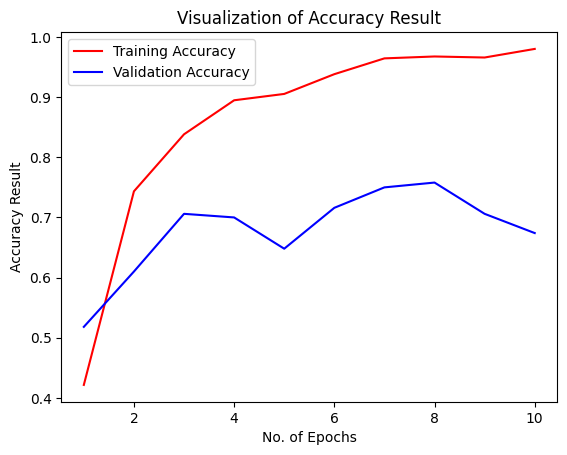

In [51]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [52]:
class_name = Validation_set.class_names
class_name

['Bohera',
 'Devilbackbone',
 'Haritoki',
 'Lemongrass',
 'Nayontara',
 'Neem',
 'Pathorkuchi',
 'Thankuni',
 'Tulsi',
 'Zenora']

In [53]:
# Define the path to the training directory
Test = "/content/Medicinal Plant-Bijly-withBG/Test"

# Load the training dataset using TensorFlow's image_dataset_from_directory function
test_set = tf.keras.utils.image_dataset_from_directory(
    Test,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)



Found 1000 files belonging to 10 classes.


In [54]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

32/32 [==============================] - 123s 4s/step


In [55]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [56]:
Y_true

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    

In [57]:
predicted_categories

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 7, 7, 1, 1, 0, 1, 1, 1,
       1, 7, 1, 7, 7, 1, 7, 1, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1, 7, 4, 1,
       4, 1, 1, 1, 1, 1, 4, 7, 2, 4, 4, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6,
       1, 1, 7, 8, 8, 8, 8, 1, 1, 7, 0, 1, 1, 1, 4, 1, 1, 1, 2, 4, 4, 1,
       1, 1, 1, 7, 7, 7, 8, 8, 8, 8, 1, 4, 8, 1, 7, 1, 1, 4, 1, 1, 1, 1,
       1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
    

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [59]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

       Bohera       0.95      0.96      0.96       100
Devilbackbone       0.65      0.57      0.61       100
     Haritoki       0.00      0.00      0.00       100
   Lemongrass       1.00      0.88      0.94       100
    Nayontara       0.44      0.11      0.18       100
         Neem       0.90      0.69      0.78       100
  Pathorkuchi       0.99      0.84      0.91       100
     Thankuni       0.53      0.77      0.63       100
        Tulsi       0.36      0.93      0.52       100
       Zenora       0.80      0.99      0.88       100

     accuracy                           0.67      1000
    macro avg       0.66      0.67      0.64      1000
 weighted avg       0.66      0.67      0.64      1000



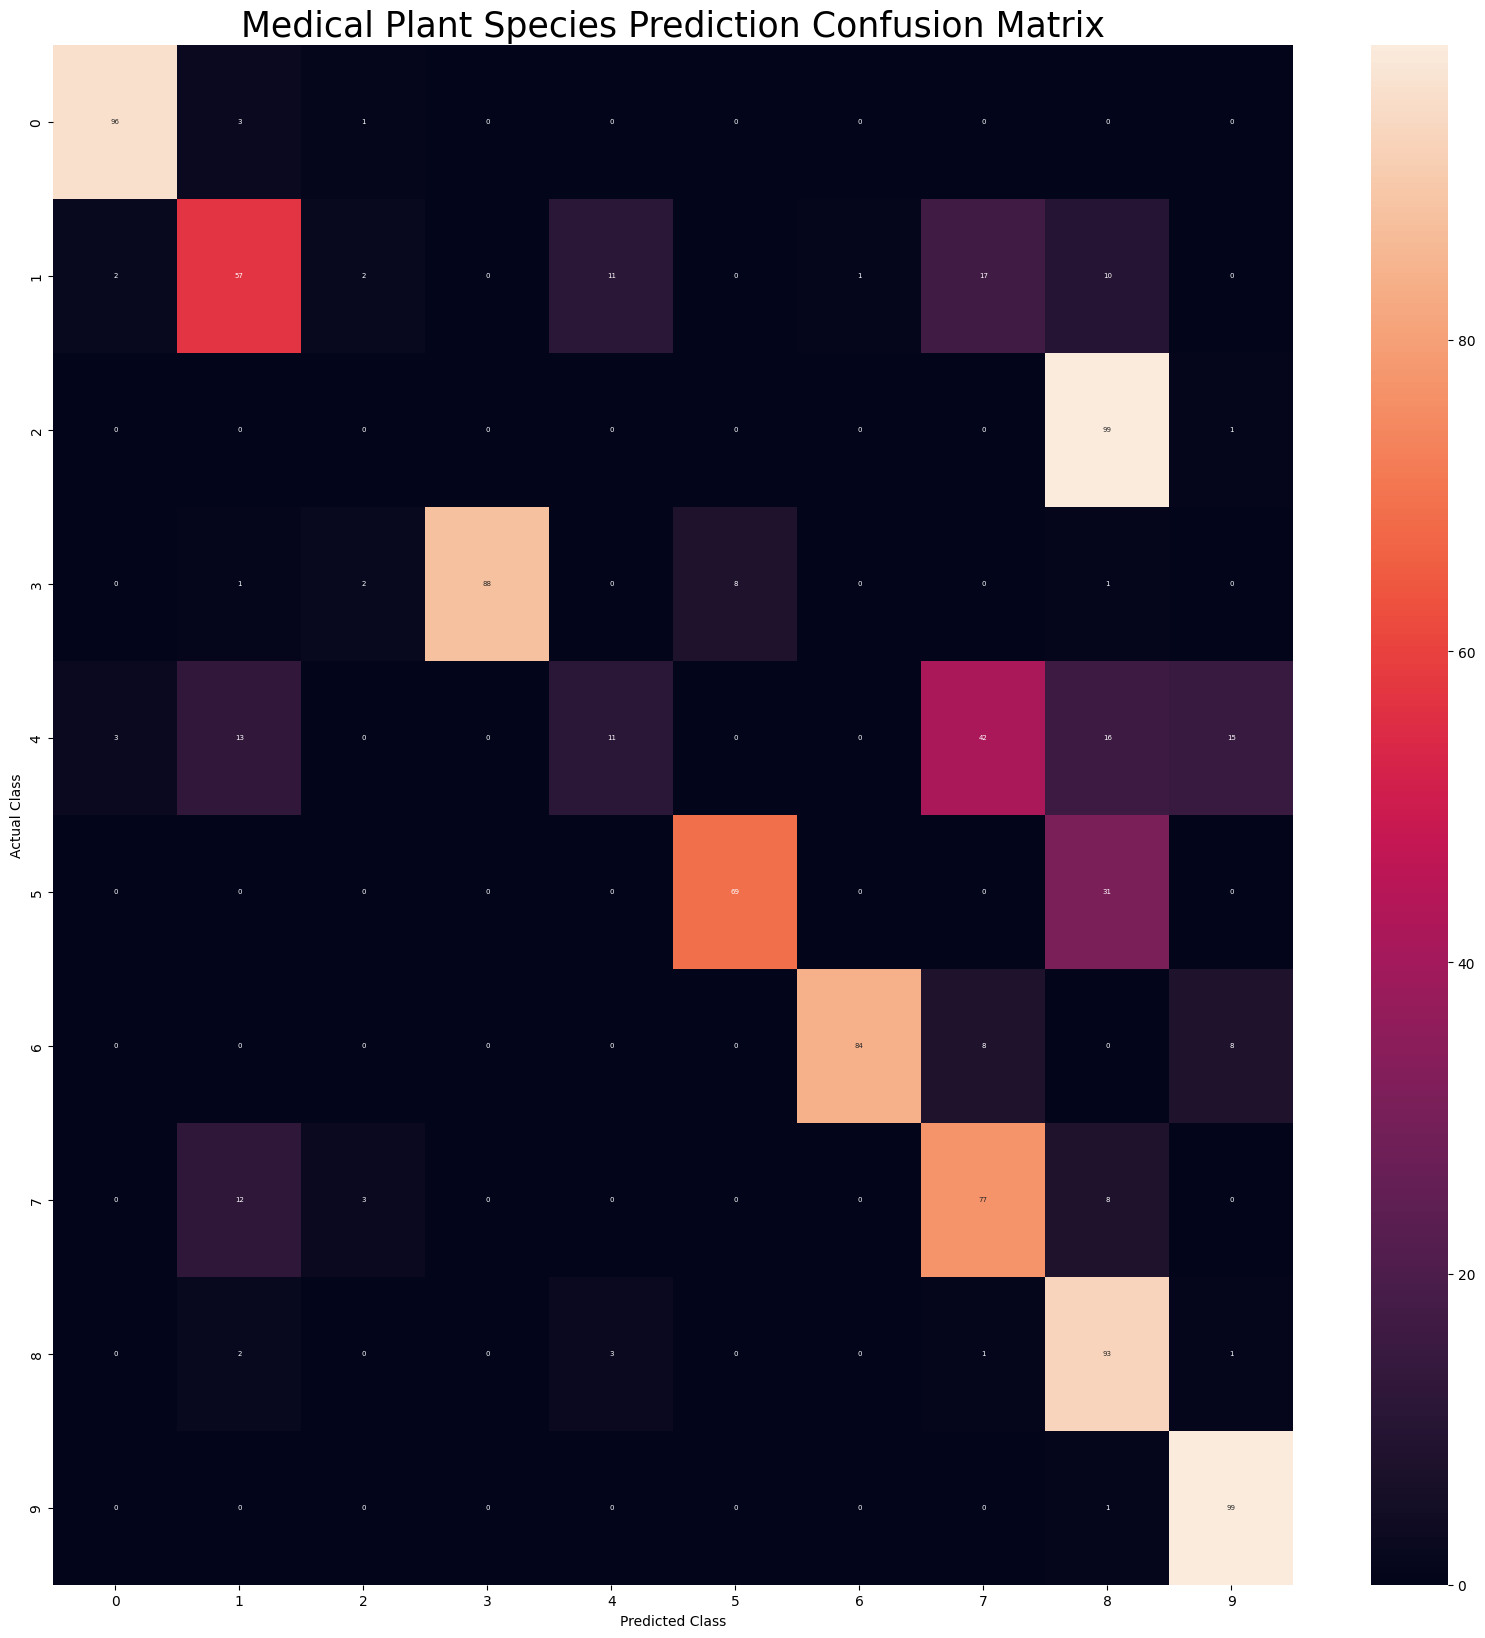

In [60]:
plt.figure(figsize=(20, 20))
sns.heatmap(cm,annot=True,annot_kws={"size": 5})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Medical Plant Species Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [61]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [62]:
# Define the path to the training directory
Test = "/content/Medicinal Plant-Bijly-withBG/Test"

# Load the training dataset using TensorFlow's image_dataset_from_directory function
test_set = tf.keras.utils.image_dataset_from_directory(
    Test,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 1000 files belonging to 10 classes.


In [63]:
cnn = tf.keras.models.load_model('trained_medical_plant_model.keras')

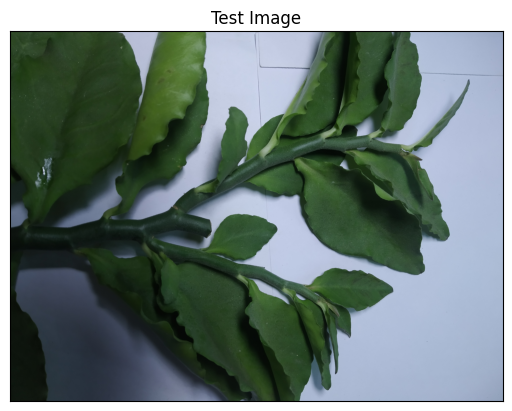

In [64]:
#Test Image Visualization
import cv2
image_path = '/content/Medicinal Plant-Bijly-withBG/Test/Devilbackbone/(1).jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [65]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 1s 731ms/step


In [66]:
print(predictions)

[[2.2510412e-04 9.4799632e-01 4.2100931e-03 8.6827255e-05 7.2274670e-05
  5.7416521e-05 3.3939999e-05 3.5093732e-02 1.2202279e-02 2.1989952e-05]]


In [67]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


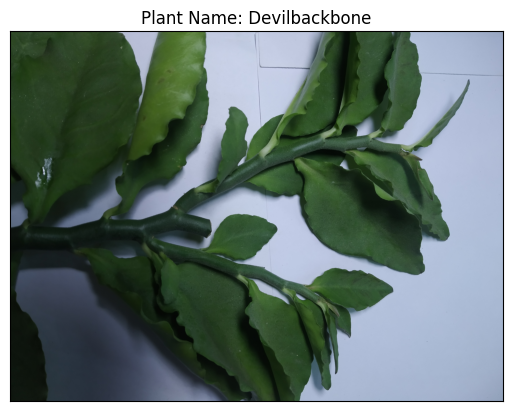

In [68]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Plant Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [69]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [70]:
import streamlit as st

# Streamlit app code
st.title('My App')

# Add Streamlit widgets, data processing, etc.


2024-03-20 09:12:24.429 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [109]:
%%writefile my_app.py
import streamlit as st
import tensorflow as tf
import numpy as np


#Tensorflow Model Prediction
def model_prediction(test_image):
    model = tf.keras.models.load_model(" trained_medical_plant_model.keras")
    image = tf.keras.preprocessing.image.load_img(test_image,target_size=(128,128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr]) #convert single image to batch
    predictions = model.predict(input_arr)
    return np.argmax(predictions) #return index of max element




# Sidebar
st.sidebar.title("Medical Plant Species Identification")

# Main Page
app_mode = st.sidebar.selectbox("Select Page", ["Home", "About", "Species Identification"])

if app_mode == "Home":
    st.header("Identifying Medical Plant Species ")
    st.image("/content/neem-tree-2-scaled.jpeg", use_column_width=True)
    st.markdown("""
        Welcome to the Medical Plant Species Identification System! 🌿🔍

        Our mission is to assist in identifying medical plant species accurately. Upload an image of a plant,
        and our system will analyze it to determine the species. Let's contribute to medical research and
        conservation efforts through plant species identification!

        ### How It Works
        1. **Upload Image:** Go to the **Species Identification** page and upload an image of a medical plant.
        2. **Analysis:** Our system will process the image using advanced computer vision algorithms to identify the species.
        3. **Results:** View the identified species along with relevant information.

        ### Why Choose Us?
        - **Accuracy:** Our system utilizes state-of-the-art machine learning techniques for precise plant species identification.
        - **User-Friendly:** Simple and intuitive interface for easy plant species identification.
        - **Fast and Efficient:** Receive results quickly, facilitating medical research and conservation efforts.

        ### Get Started
        Click on the **Species Identification** page in the sidebar to upload an image and experience the power of our Medical Plant Species Identification System!

        ### About Us
        Learn more about the project, our team, and our goals on the **About** page.
    """)

#About Project
elif app_mode == "About":
    st.header("About")

    # About the Project
    st.subheader("About the Project")
    st.markdown("""
    The Medical Plant Species Identification project aims to leverage computer vision technology to
    accurately identify various medical plant species. By utilizing state-of-the-art machine learning
    algorithms, we provide a platform for researchers, botanists, and enthusiasts to quickly and
    accurately identify medical plant species, contributing to medical research and conservation efforts.
    """)

    # Project Features
    st.subheader("Project Features")
    st.markdown("""
    - **Dataset:** The project utilizes a comprehensive dataset containing images of various medical plant species.
    - **Model:** We employ a deep learning model trained on the dataset to achieve accurate plant species identification.
    - **Application:** The project provides a user-friendly web application for easy plant species identification.
    """)

    # Team Members
    st.subheader("Team Members")

    # Define team members with their names and image paths
    team_members = {
        'OKUMU GEOFFERY (Project Lead)': '/content/OKUMU.jpg',
        'KIKOME CHRISTINE (Machine Learning Engineer)': '/content/1.jpg',
        'WAGISHA EMMANUEL (Web Developer)': '/content/WAGISHA.jpg'
    }

    # Display team members' names and images horizontally with circular images
    col1, col2, col3 = st.columns(3)

    with col1:
        st.image('/content/OKUMU.jpg', width=100, use_column_width=False, caption='OKUMU GEOFFERY (Project Lead)', output_format='PNG')

    with col2:
        st.image('/content/1.jpg', width=100, use_column_width=False, caption='KIKOME CHRISTINE (Machine Learning Engineer)', output_format='PNG')

    with col3:
        st.image('/content/WAGISHA.jpg', width=100, use_column_width=False, caption='WAGISHA EMMANUEL (Web Developer)', output_format='PNG')

#Prediction Page
elif app_mode == "Species Identification":
    st.header("Species Identification")
    test_image = st.file_uploader("Choose an Image:")
    if(st.button("Show Image")):
      st.image(test_image,width=4,use_column_width=True)
    if(st.button("Predict")):
      st.snow()
      st.write("Our Prediction")
      result_index = model_prediction(test_image)
      class_name = {'Bohera': 'Terminalia bellirica',
                    'Devilbackbone': 'Euphorbia tithymaloides',
                    'Haritoki': 'Terminalia chebula',
                    'Lemongrass': 'Cymbopogon citratus',
                    'Nayontara': 'Catharanthus roseus',
                    'Neem': 'Azadirachta indica',
                    'Pathorkuchi': 'Kalanchoe pinnata',
                    'Thankuni': 'Centella asiatica',
                    'Tulsi': 'Ocimum tenuiflorum',
                    'Zenora': ''}

      st.success("Model is Predicting it's a {}".format(class_name[result_index]))


Overwriting my_app.py


In [92]:
!pip install pyngrok

In [88]:
from pyngrok import ngrok

In [93]:
ngrok.set_auth_token("2dupxFzuzs3FXX5xfHhEPF55Dfc_45nKV7t27MuEKR2NaPBBb")

In [96]:
# Start Streamlit app on port 80
!nohup streamlit run my_app.py --server.port 80 &

# Connect ngrok to port 80
url = ngrok.connect(addr='80', proto='http')
print("Ngrok URL:", url)


nohup: appending output to 'nohup.out'
Ngrok URL: NgrokTunnel: "https://13c7-34-106-59-10.ngrok-free.app" -> "http://localhost:80"


In [7]:
! pip install mlflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.0 MB/s eta 0:00:00


In [8]:
import tensorflow as tf

# Load your trained TensorFlow model
model = tf.keras.models.load_model("/content/trained_medical_plant_model.keras")


In [13]:
import mlflow
# End the current MLflow run
mlflow.end_run()




# Start MLflow run
mlflow.start_run()

# Log parameters (if applicable)
mlflow.log_param("learning_rate", 0.01)
mlflow.log_param("epochs", 10)

# Log metrics (if applicable)
mlflow.log_metric("accuracy", 0.85)
mlflow.log_metric("loss", 0.2)

# Log artifacts (e.g., trained model)
mlflow.keras.log_model(model, "model")

# End MLflow run
mlflow.end_run()


2024/03/20 12:00:18 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


In [ ]:
!mlflow ui --port 5000 &
!ngrok authtoken 2dupxFzuzs3FXX5xfHhEPF55Dfc_45nKV7t27MuEKR2NaPBBb
!ngrok http 5000


[2024-03-20 12:03:47 +0000] [86829] [INFO] Starting gunicorn 21.2.0
[2024-03-20 12:03:47 +0000] [86829] [INFO] Listening at: http://127.0.0.1:5000 (86829)
[2024-03-20 12:03:47 +0000] [86829] [INFO] Using worker: sync
[2024-03-20 12:03:47 +0000] [86830] [INFO] Booting worker with pid: 86830
[2024-03-20 12:03:47 +0000] [86831] [INFO] Booting worker with pid: 86831
[2024-03-20 12:03:47 +0000] [86832] [INFO] Booting worker with pid: 86832
[2024-03-20 12:03:47 +0000] [86833] [INFO] Booting worker with pid: 86833
